<a href="https://colab.research.google.com/github/PranavKapoor28/Data-science-and-engineering/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Sci Eng Methods Assignment 1 – ML Data Cleaning and Feature Selection ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

## Answer the following questions:

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?
Remove outliers and keep outliers (does if have an effect of the final predictive model)?
Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

#Abstract

#### This dataset consists of job postings collected from Glassdoor.com during the period of 2017 to 2018. It includes information such as the job title, estimated salary, job description, company rating, company name, location, headquarters, company size, year of establishment, ownership type, industry, sector, revenue, and competitors. The dataset also includes information on the minimum and maximum hourly wage, average salary, number of competitors, and length of the job description. If you are searching for a job in the field of data science, this dataset provides a wealth of information to explore.


#### In this dataset, the following features are included for each job posting:

1. job_id: a unique identifier assigned to each job posting (numeric)
2. job_state: the location of the job (string)
3. same_state: a binary variable indicating if the job is in the same state as the person viewing it (string)
4. age: the age of the person viewing the job (numeric)
5. python_yn: a binary variable indicating if the person viewing the job knows Python (string)
6. R_yn: a binary variable indicating if the person viewing the job knows R (string)
7. spark: a binary variable indicating if the person viewing the job knows Spark (string)
8. aws: a binary variable indicating if the person viewing the job knows AWS (string)
9. excel: a binary variable indicating if the person viewing the job knows Excel (string)
10. job_simp: a simplified job title (string)
11. seniority: the seniority level of the job (string)
12. desc_len: the length of the job description (numeric)
13. num_comp: the number of competitors for the job (numeric)

In [1]:
!pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import math

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/PranavKapoor28/Data-science-and-engineering/main/eda_data.csv")
glassdoor_data = pd.read_csv("https://raw.githubusercontent.com/PranavKapoor28/Data-science-and-engineering/main/glassdoor_jobs.csv")


In [4]:
#Viewing data in the file 
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [5]:
#Viewing glassdoor data in the file 
glassdoor_data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Q1 --  What are the data types ? ( Only numeric and categorical )

In [6]:
#dimensions
print("The Dimensions of the eda data are:",data.shape)
print("\n")
#data types
print(data.info())

#dimensions
print("The Dimensions of the glassdoor data are:",glassdoor_data.shape)
print("\n")
#data types
print(glassdoor_data.info())

The Dimensions of the eda data are: (742, 33)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non

###  Q2 -- Are there any missing values ?

In [7]:
#checking if the any data is missing
data.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [8]:
#checking if the any data is missing
glassdoor_data.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

### Based on above findings we can see that no data is missing from our data. Hence we don't need to remove any missing values.

#### Continous features: Salary Estimate, Rating, min_salary, max_salary, avg_salary, size.

#### Categorical features: Job Title, Job description, Company name, Location, Headquarters, , sex, native-country, income.

## Q10 - What are the distributions of the predictor variables?**

In [9]:
continuous_features=data.describe()
continuous_features

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [10]:
categorical_features_glassdoor=data.describe(include=['object'])
categorical_features_glassdoor

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,company_txt,job_state,job_simp,seniority
count,742,742,742,742,742,742,742,742,742,742,742,742,742,742,742,742
unique,264,416,463,343,200,198,9,11,60,25,14,128,343,37,7,3
top,Data Scientist,$49K-$113K (Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,MassMutual\n3.6,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1,MassMutual,CA,data scientist,na
freq,131,6,4,14,55,52,150,410,112,180,203,460,14,152,279,520


### Q3 - What are the likely distributions of the numeric variables?

### Q9 -- Do the ranges of the predictor variables make sense?

In [11]:
data.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


#### Based on these observations we can see see the likely distributions of our data along with mean and std. Hence, they make sense.

     age  min_salary  max_salary  avg_salary  Rating
0     47          53          91        72.0     3.8
1     36          63         112        87.5     3.4
2     10          80          90        85.0     4.8
3     55          56          97        76.5     3.8
4     22          86         143       114.5     2.9
..   ...         ...         ...         ...     ...
737  190          58         111        84.5     3.9
738   14          72         133       102.5     4.4
739   36          56          91        73.5     2.6
740   -1          95         160       127.5     3.2
741   53          61         126        93.5     3.6

[742 rows x 5 columns]
age


<Figure size 576x360 with 0 Axes>

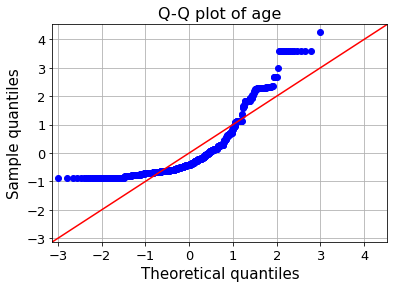

min_salary


<Figure size 576x360 with 0 Axes>

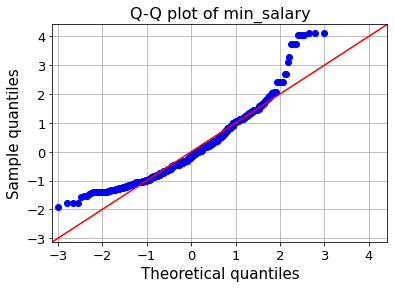

max_salary


<Figure size 576x360 with 0 Axes>

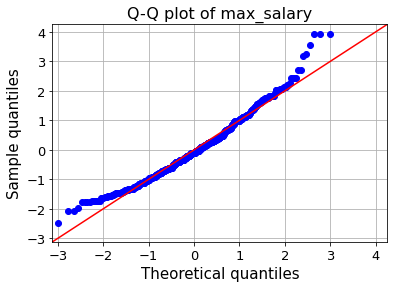

avg_salary


<Figure size 576x360 with 0 Axes>

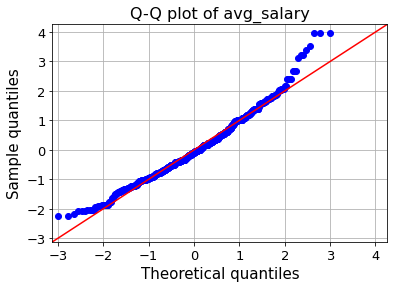

Rating


<Figure size 576x360 with 0 Axes>

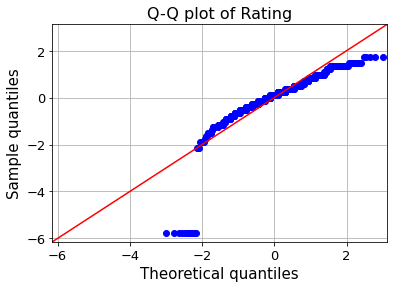

In [12]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['age','min_salary', 'max_salary', 'avg_salary','Rating']]
print(data_norm)
for c in data_norm.columns[:]:
    print(c)
    plt.figure(figsize=(8,5))
    fig=qqplot(data_norm[c],line='45',fit='True')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles",fontsize=15)
    plt.ylabel("Sample quantiles",fontsize=15)
    plt.title("Q-Q plot of {}".format(c),fontsize=16)
    plt.grid(True)
    plt.show()

##### 1. Looking at the Q-Q plot above, it appears that all independent variables are roughly following normal distribution
##### 2. There are few outliers in few of the predictor variables like in avg-salary, max_salary, min_salary, age.

## Q4 -- Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

### 1. Correlation

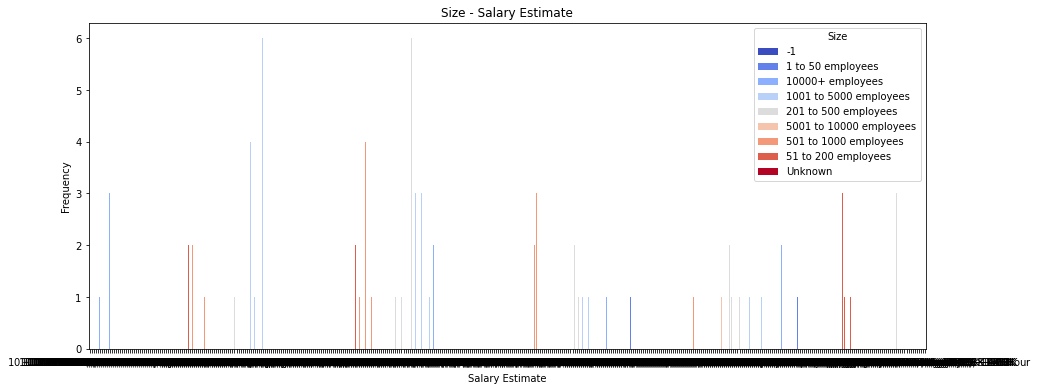

In [13]:
pd.crosstab(data['Salary Estimate'],data['Size']).plot(kind="bar",figsize=(15,6),colormap="coolwarm")
plt.title('Size - Salary Estimate')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

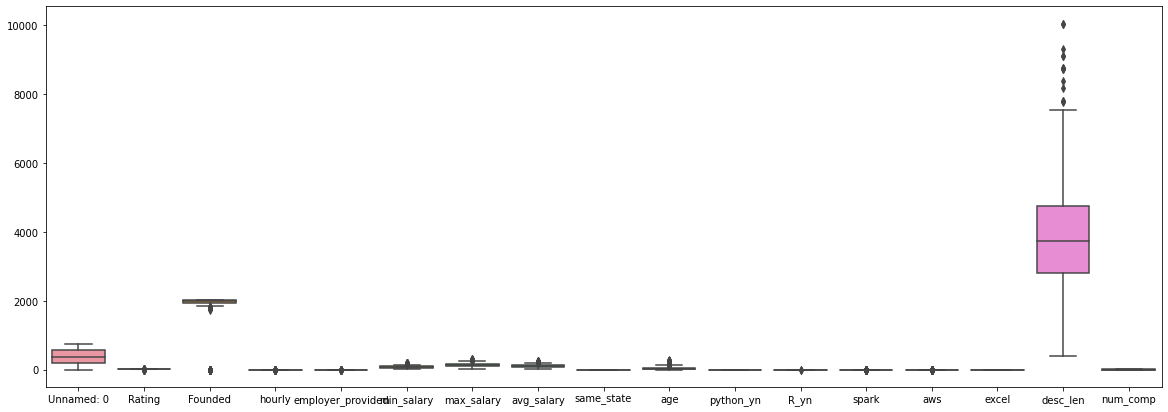

In [14]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

From the given data we have computed the corelation between salary estimate and size and we have found out that median size of company with highest salaries range between 50000-10000 employess.

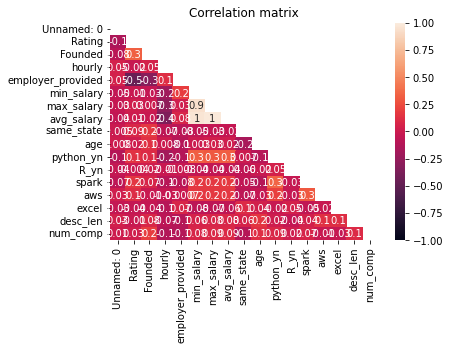

In [15]:
corr = data.corr()
matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix')
plt.show()

#### We can see there are lot of co-relation among the variables. 

In [16]:
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        if abs(corr.iloc[i, j]) > 0.8:
            print(f"Predictor variables {corr.columns[i]} and {corr.columns[j]} are highly correlated.")

Predictor variables min_salary and max_salary are highly correlated.
Predictor variables min_salary and avg_salary are highly correlated.
Predictor variables max_salary and avg_salary are highly correlated.


This suggests that min_salary, max_salary and avg_salary metrics are highly correlated as they have correlation value greater than 0.8.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
predictors = ['Rating', 'age']
X = data[predictors].values

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
for idx, val in enumerate(vif):
    print(f"VIF for {predictors[idx]}: {val}")

VIF for Rating: 1.7053176526698783
VIF for age: 1.7053176526698788


#### A VIF of 1 indicates that there is no multicollinearity between the predictor variable and the other predictor variables in the model. A VIF greater than 1 indicates that the predictor variable is correlated with one or more other predictor variables in the model.


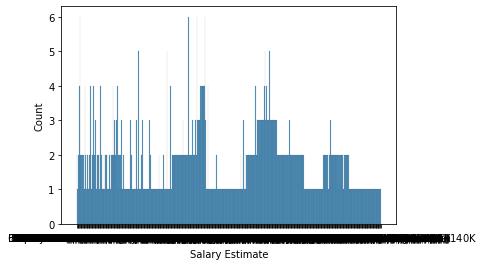

In [18]:
sns.histplot(x='Salary Estimate', data=data, )
plt.show()

## Q6 -  Which predictor variables are the most important?



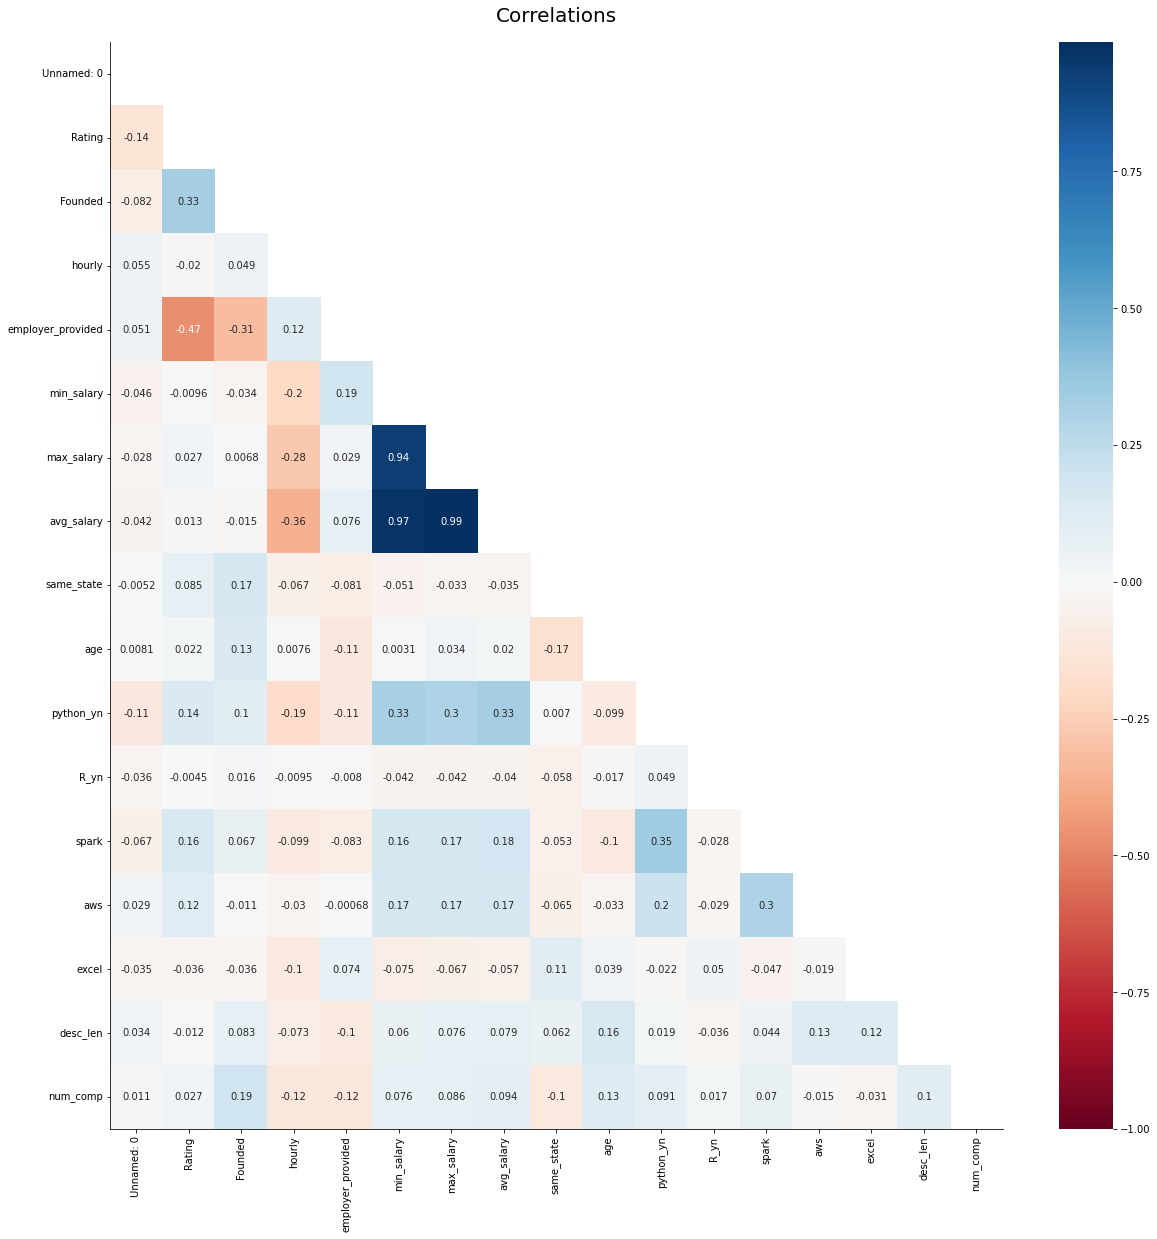

In [19]:
plt.figure(figsize= (20,20))
sns.heatmap(data.corr(),vmin = -1, cmap = 'RdBu', annot = True, mask = np.triu(np.ones_like(data.corr())))
plt.title('Correlations', fontsize = 20, pad = 20)
sns.despine()
plt.show()

One of the most importnant features that we can see is avg_salary. 

## Q7 -- In the predictor variables independent of all the other predictor variables?

<function matplotlib.pyplot.show(*args, **kw)>

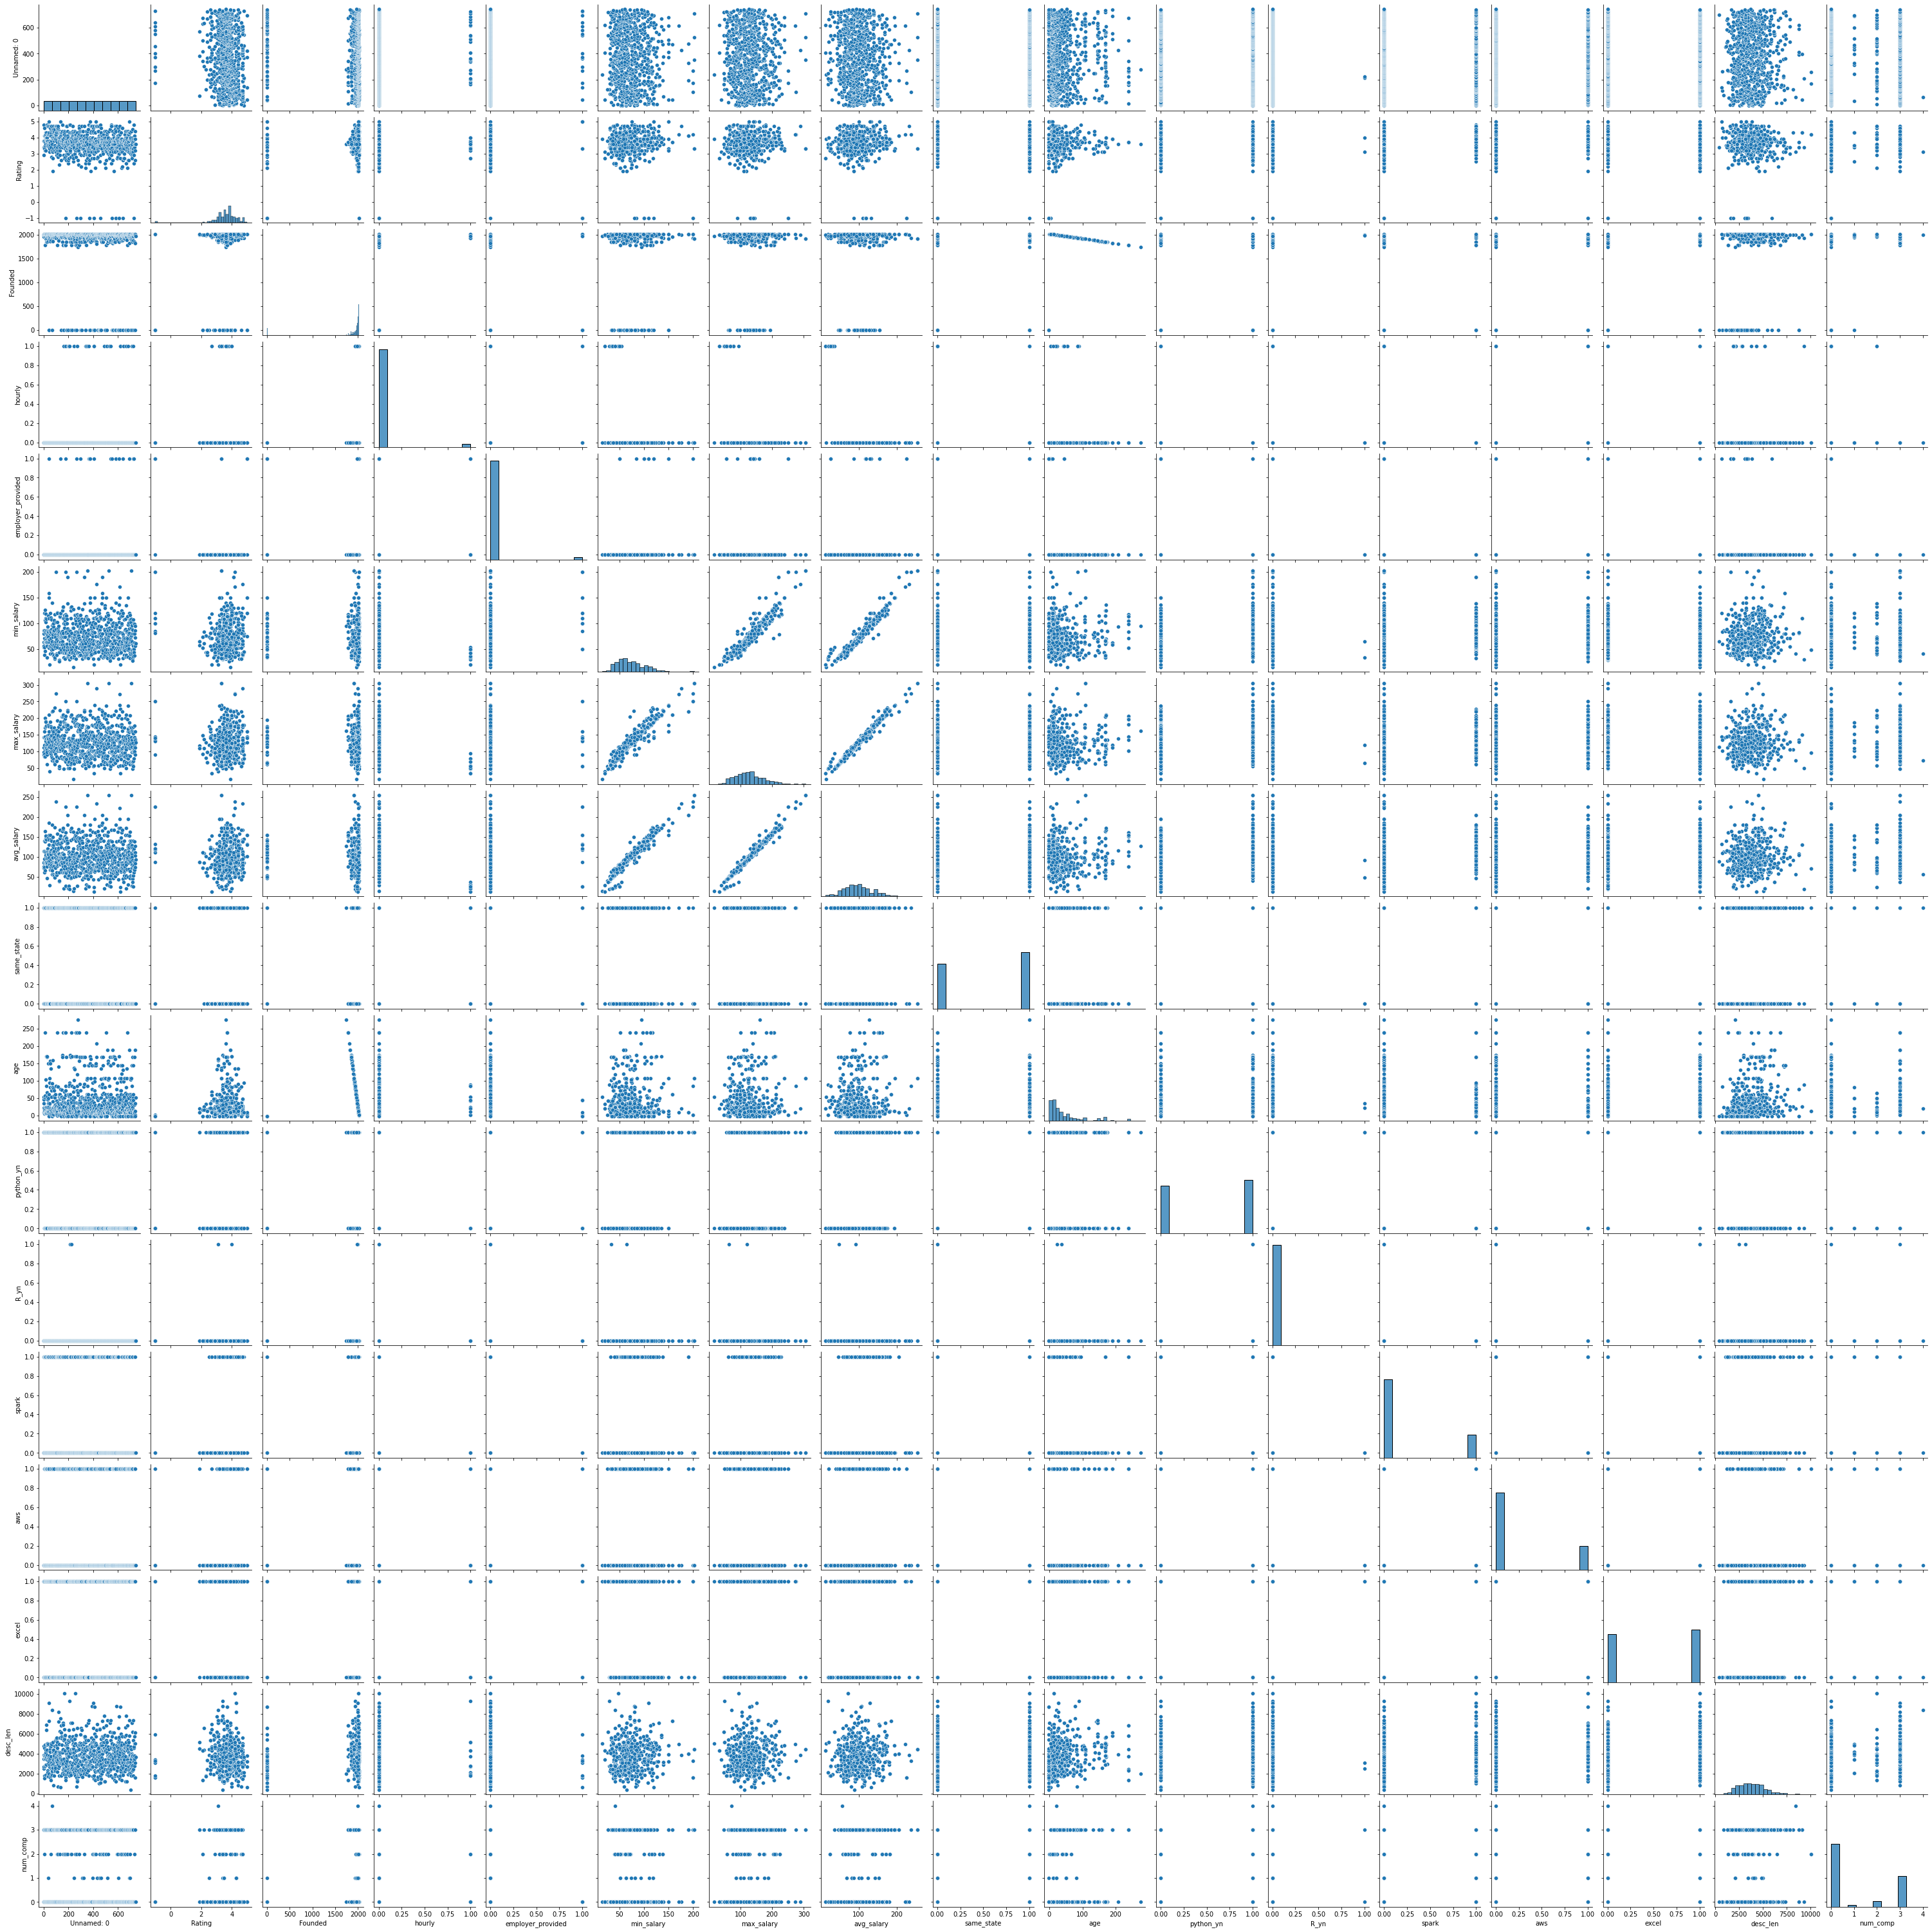

In [20]:
#pair plot to check the colinearity
sns.pairplot(data) 
plt.show

### We can see that predictor variables are not independednt of each other and have correlation between the,

In [21]:
data.corr()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
Unnamed: 0,1.000000,-0.140749,-0.081972,0.054556,0.050779,-0.046469,-0.027821,-0.041765,-0.005156,0.008115,-0.109075,-0.036406,-0.066719,0.028519,-0.034655,0.033758,0.010980
Rating,-0.140749,1.000000,0.332927,-0.019531,-0.468234,-0.009573,0.027344,0.013492,0.085033,0.021655,0.144665,-0.004472,0.156982,0.117049,-0.036466,-0.012281,0.027190
Founded,-0.081972,0.332927,1.000000,0.049313,-0.312761,-0.033999,0.006776,-0.015149,0.171512,0.134682,0.103183,0.016045,0.066978,-0.011123,-0.035567,0.083119,0.191265
hourly,0.054556,-0.019531,0.049313,1.000000,0.124748,-0.203556,-0.276730,-0.356082,-0.067351,0.007626,-0.193487,-0.009505,-0.098530,-0.030315,-0.099897,-0.073194,-0.117265
employer_provided,0.050779,-0.468234,-0.312761,0.124748,1.000000,0.187591,0.028794,0.076287,-0.081349,-0.109288,-0.107924,-0.007961,-0.082524,-0.000685,0.074129,-0.102218,-0.116665
min_salary,-0.046469,-0.009573,-0.033999,-0.203556,0.187591,1.000000,0.940136,0.967765,-0.051097,0.003110,0.326910,-0.042349,0.164671,0.168893,-0.075234,0.060420,0.076004
max_salary,-0.027821,0.027344,0.006776,-0.276730,0.028794,0.940136,1.000000,0.986862,-0.032784,0.034395,0.301481,-0.041587,0.171317,0.170911,-0.067175,0.075634,0.086195
avg_salary,-0.041765,0.013492,-0.015149,-0.356082,0.076287,0.967765,0.986862,1.000000,-0.034641,0.019655,0.327796,-0.040000,0.176559,0.171379,-0.057252,0.078808,0.093813
same_state,-0.005156,0.085033,0.171512,-0.067351,-0.081349,-0.051097,-0.032784,-0.034641,1.000000,-0.166680,0.006975,-0.058407,-0.053139,-0.065070,0.106026,0.062387,-0.102635
age,0.008115,0.021655,0.134682,0.007626,-0.109288,0.003110,0.034395,0.019655,-0.166680,1.000000,-0.099160,-0.016533,-0.102788,-0.033081,0.039033,0.163911,0.126687


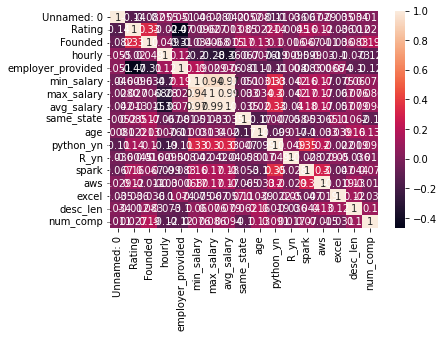

In [22]:
sns.heatmap(data.corr(), annot = True)

#### Correlation matrix and heatmap shows that there is multicollinearity between the independent variables.


## 2. Predicting dependent variables using GGPLOT

In [23]:
plot_salary_data = data[data['Job Title'].isin(["Data Analyst","Research Scientist","Data Engineer",
                              "Data Scientist","Machine Learning Engineer","Director"])].copy()

plot_salary_data['job_title_numeric'] = plot_salary_data['Job Title'].apply(lambda x: 1 if x == "Data Analyst" else (2 if x == "Research Scientist" else (3 if x == "Data Engineer" else (4 if x == "Machine Learning Engineer" else (5 if x == "Data Scientist" else (6 if x == "Director" else 10))))))

plot_salary_data['max_salary'] = 1000 * plot_salary_data['max_salary']
plot_salary_data['avg_salary'] = 1000 * plot_salary_data['avg_salary']
plot_salary_data['min_salary'] = 1000 * plot_salary_data['min_salary']

grouped = plot_salary_data.groupby('Job Title').agg({'Job Title': 'count'})
grouped.rename(columns={'new_job_title': 'group_count'}, inplace=True)
plot_salary_data = plot_salary_data.merge(grouped, left_on='Job Title', right_index=True)

salary_label_data = plot_salary_data.groupby(['Job Title','job_title_numeric']).agg({'avg_salary': ['mean', 'median'], 'Job Title': 'count'})
salary_label_data.columns = salary_label_data.columns.droplevel(0)
salary_label_data.rename(columns={'mean': 'mean_salary', 'median': 'median_salary', 'count': 'count'}, inplace=True)
salary_label_data.reset_index(inplace=True)
salary_label_data.sort_values('median_salary', ascending=False, inplace=True)

<ipython-input-24-16131420bc2f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_salary_data['job_title_numeric'] = plot_salary_data['Job Title'].map({
<ipython-input-24-16131420bc2f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_salary_data['max_salary'] = plot_salary_data['max_salary'] * 1000
<ipython-input-24-16131420bc2f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

([<matplotlib.axis.YTick at 0x7fba5110af10>,
 [Text(0, 0, 'Data Scientist'),
  Text(0, 0, 'Machine Learning Engineer'),
  Text(0, 0, 'Data Engineer'),
  Text(0, 0, 'Data Analyst'),
  Text(0, 0, 'Research Scientist')])

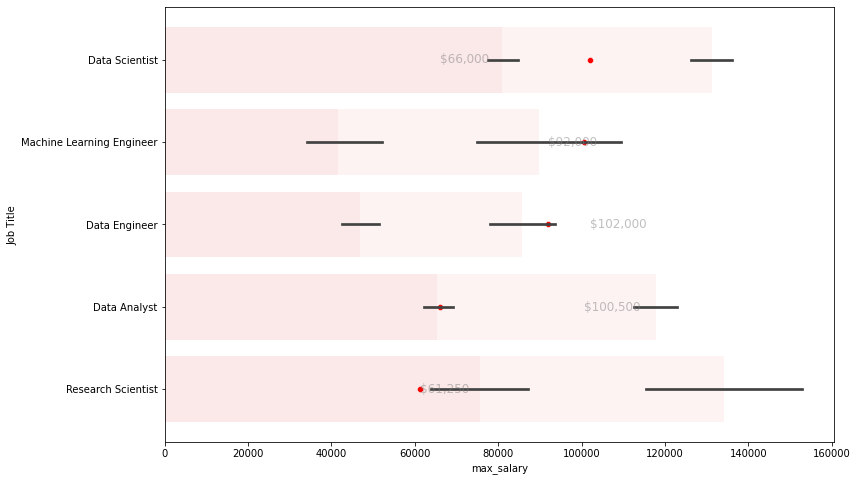

In [24]:
# Filter the data
plot_salary_data = data.loc[data['Job Title'].isin(["Data Analyst",
                                                                "Research Scientist",
                                                                "Data Engineer",
                                                                "Data Scientist",
                                                                "Machine Learning Engineer",
                                                                "Director"])]

# Create job_title_numeric column
plot_salary_data['job_title_numeric'] = plot_salary_data['Job Title'].map({
    "Data Analyst": 1,
    "Research Scientist": 2,
    "Data Engineer": 3,
    "Machine Learning Engineer": 4,
    "Data Scientist": 5,
    "Director": 6
})

# Convert salary values to thousands
plot_salary_data['max_salary'] = plot_salary_data['max_salary'] * 1000
plot_salary_data['avg_salary'] = plot_salary_data['avg_salary'] * 1000
plot_salary_data['min_salary'] = plot_salary_data['min_salary'] * 1000

# Group by new_job_title and calculate count
grouped_data = plot_salary_data.groupby(['Job Title'])
plot_salary_data['group_count'] = grouped_data['Job Title'].transform('count')

# Calculate mean and median salary
salary_label_data = plot_salary_data.groupby(['Job Title', 'job_title_numeric'])[['avg_salary']].agg(['mean', 'median'])
salary_label_data.columns = salary_label_data.columns.droplevel()
salary_label_data.reset_index(inplace=True)

# Sort by median salary
salary_label_data.sort_values(by='median', ascending=False, inplace=True)

# Plot the salary range as rectangles
plt.figure(figsize=(12, 8))
sns.barplot(x='min_salary', y='Job Title', color='red', alpha=0.05, data=plot_salary_data)
sns.barplot(x='max_salary', y='Job Title', color='red', alpha=0.05, data=plot_salary_data)

# Plot median salary as point
sns.scatterplot(x='median', y='Job Title', color='red', data=salary_label_data)

# Add median salary labels
for i, row in salary_label_data.iterrows():
    plt.text(row['median'], i, '$' + "{:,}".format(int(row['median'])), ha='left', va='center', fontsize=12, color='grey', alpha=0.5)

# Set y-axis labels
plt.yticks(range(len(salary_label_data)), salary_label_data['Job Title'])



Data scientist tend to make the highest salary, although we have very few data points to corroborate this result. Thus, Job title is also an independent variable for prediting average salary of a person.

In [25]:
import pandas as pd

data['Job.Description.Lower'] = data['Job Description'].str.lower()
processed_data = data.assign(r_bool=data['Job Description'].str.contains('[,|.|;|(|/|[:space:]]R[,|.|;|)|/|[:space:]]'),
                                 python_bool=data['Job.Description.Lower'].str.contains('python|pytorch|sci-kit'),
                                 aws_bool=data['Job.Description.Lower'].str.contains('[,|.|;|(|/|[:space:]]aws[,|.|;|)|/|[:space:]]|amazon|ec2|s3|redshift'),
                                 cSharp_bool=data['Job.Description.Lower'].str.contains('c#'),
                                 spark_bool=data['Job.Description.Lower'].str.contains('spark'),
                                 excel_bool=data['Job.Description.Lower'].str.contains('excel'),
                                 tableau_bool=data['Job.Description.Lower'].str.contains('tableau'),
                                 powerBI_bool=data['Job.Description.Lower'].str.contains('power bi'),
                                 cPlusPlus_bool=data['Job.Description.Lower'].str.contains('c\\+\\+'),
                                 sql_bool=data['Job.Description.Lower'].str.contains('sql'),
                                 sas_bool=data['Job.Description.Lower'].str.contains('[,|.|;|(|/|[:space:]]sas[,|.|;|)|/|[:space:]]'),
                                 git_bool=data['Job.Description.Lower'].str.contains('[,|.|;|(|/|[:space:]]git[,|.|;|)|/|[:space:]]'),
                                 commandLine_bool=data['Job.Description.Lower'].str.contains('linux|unix|shell|terminal|command line'))
processed_data['RorPython_bool'] = processed_data['r_bool'] | processed_data['python_bool']
processed_data['RAndPython_bool'] = processed_data['r_bool'] & processed_data['python_bool']
processed_data['ROnly_bool'] = processed_data['r_bool'] & ~processed_data['python_bool']
processed_data['PythonOnly_bool'] = processed_data['python_bool'] & ~processed_data['r_bool']
processed_data['tableauOrPowerBI'] = processed_data['tableau_bool'] | processed_data['powerBI_bool']

# Look how often each skill is represented
print(processed_data[['r_bool', 'python_bool', 'aws_bool', 'cSharp_bool', 'spark_bool',
                      'excel_bool']])

data_list = []
skill_columns = ["aws_bool","spark_bool","cPlusPlus_bool","sql_bool", "sas_bool","git_bool","RorPython_bool","tableauOrPowerBI", "commandLine_bool"]
skill_labels = ["AWS\n(S3,EC2,Redshift,etc)","Spark","C++","SQL","SAS","git","Python or R","Tableau/Power BI", "Command Line \nInterface"]
common_cols = ["min_salary","avg_salary","max_salary"]


data_science_skills = processed_data[processed_data['Job Title'] == "Data Scientist"][common_cols + skill_columns]

for i in range(len(skill_columns)):
    skill = skill_columns[i]
    skill_label = skill_labels[i]
  
    skill_df = data_science_skills[[skill] + common_cols]
    skill_df = skill_df.loc[skill_df[skill] == True]
    skill_df["skill"] = skill_label
    data_list.append(skill_df)

data_science_skills_df = pd.concat(data_list)
data_science_skills_df["job_skill_numeric"] = pd.np.where(
    data_science_skills_df["skill"] == "SAS", 1,
    pd.np.where(
        data_science_skills_df["skill"] == "Tableau/Power BI", 2,
        pd.np.where(
            data_science_skills_df["skill"] == "SQL", 3,
            pd.np.where(
                data_science_skills_df["skill"] == "C++", 4,
                pd.np.where(
                    data_science_skills_df["skill"] == "Python or R", 5,
                    pd.np.where(
                        data_science_skills_df["skill"] == "git", 6,
                        pd.np.where(
                            data_science_skills_df["skill"] == "Spark", 7,
                            pd.np.where(
                                data_science_skills_df["skill"] == "AWS\n(S3,EC2,Redshift,etc)", 8,
                                pd.np.where(
                                    data_science_skills_df["skill"] == "Command Line \nInterface", 9,
                                    20
                                )
                            )
                        )
                    )
                )
            )
        )
    )
)
data_science_skills_df["max_salary"] = 1000 * data_science_skills_df["max_salary"]
data_science_skills_df["avg_salary"] = 1000 * data_science_skills_df["avg_salary"]
data_science_skills_df["min_salary"] = 1000 *  data_science_skills_df["min_salary"]

data_science_skills_DF = data_science_skills_df.groupby(["skill"]).size().reset_index(name="group_count")


data_science_skills_summary = (
    data_science_skills_df.groupby(["skill"])
    .agg(
        count=pd.NamedAgg(column="avg_salary", aggfunc="count"),
        mean_salary=pd.NamedAgg(column="avg_salary", aggfunc="mean"),
        median_salary=pd.NamedAgg(column="avg_salary", aggfunc="median"),
        mean_low=pd.NamedAgg(column="min_salary", aggfunc="mean"),
        median_low=pd.NamedAgg(column="min_salary", aggfunc="median"),
        mean_high=pd.NamedAgg(column="max_salary", aggfunc="mean"),
        median_high=pd.NamedAgg(column="max_salary", aggfunc="median"),
        low_20_interval=pd.NamedAgg(column="avg_salary", aggfunc=lambda x: np.percentile(x,20)),
        high_80_interval=pd.NamedAgg(column="avg_salary", aggfunc=lambda x: np.percentile(x,80))
    )
)



     r_bool  python_bool  aws_bool  cSharp_bool  spark_bool  excel_bool
0     False         True     False        False       False        True
1     False         True     False         True       False       False
2     False         True     False        False        True        True
3     False         True     False        False       False       False
4     False         True     False        False       False        True
..      ...          ...       ...          ...         ...         ...
737   False        False     False        False       False       False
738   False         True     False        False        True       False
739   False        False     False        False       False        True
740   False        False     False        False       False        True
741   False         True     False        False       False       False

[742 rows x 6 columns]


<ipython-input-25-a99a76e955bb>:45: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data_science_skills_df["job_skill_numeric"] = pd.np.where(
<ipython-input-25-a99a76e955bb>:47: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(
<ipython-input-25-a99a76e955bb>:49: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(
<ipython-input-25-a99a76e955bb>:51: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(
<ipython-input-25-a99a76e955bb>:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(
<ipython-input-25-a99a76e955bb>:55

## 3. Predicting dependent variables (skills) using Heatmap

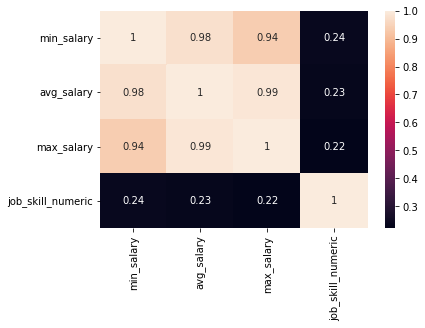

In [26]:
sns.heatmap(data_science_skills_df.corr(), annot = True)

This shows that skills are also independent variables that are used in predicting target variable.

# Q5 -Which independent variables have missing data? How much?

In [27]:
for col in data.columns:
    print("Column:",col, "\n\n", data[col].value_counts(),"\n")

Column: Unnamed: 0 

 0      1
498    1
489    1
490    1
491    1
      ..
249    1
250    1
251    1
252    1
741    1
Name: Unnamed: 0, Length: 742, dtype: int64 

Column: Job Title 

 Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64 

Column: Salary Estimate 

 $49K-$113K (Glassdoor est.)         6
$86K-$143K (Glassdoor est.)         6
$54K-$115K (Glassdoor est.)         6
$21-$34 Per Hour(Glassdoor est.)    6
$74K-$124K (Glassdoor est.)         5
                                   ..
$74K-$119K (Glassdoor est.)         1
$55K-$97K (Glassdoor est.)          1
$15K-$1

### From above data we can see no independent data is missing from our dataset.

## Q6 - Do the training and test sets have the same data?

In [28]:
#declaring vector and target variable

X = data.drop(['avg_salary'], axis=1)

y = data['avg_salary']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((519, 33), (223, 33))

In [29]:
# print percentage of missing values in the categorical variables in training set
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
X_train[numerical].isnull().mean()
# X_train[categorical].isnull().mean()

Unnamed: 0           0.0
Rating               0.0
Founded              0.0
hourly               0.0
employer_provided    0.0
min_salary           0.0
max_salary           0.0
same_state           0.0
age                  0.0
python_yn            0.0
R_yn                 0.0
spark                0.0
aws                  0.0
excel                0.0
desc_len             0.0
num_comp             0.0
dtype: float64

In [30]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

### Thus, there is no missing data in the categorical variables and it doesn't contain the same data.

In [31]:
X = glassdoor_data.iloc[:, :-1].values
y = glassdoor_data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 143)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(764, 14)
(192, 14)
(764,)
(192,)


##Q11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats

# Load your data into a DataFrame
df = data
df_np = df.apply(pd.to_numeric, errors='coerce')
df_np.dropna(inplace=True)

# Split the data into predictor variables and target variable
X = df[['Rating','Founded','hourly','employer_provided',	'min_salary',	'max_salary'	,'same_state']]
y = df['avg_salary']

# Remove outliers based on Z-score
z = np.abs(stats.zscore(X))
df_without_outliers = df[(z < 2).all(axis=1)]

# Keep the outliers
df_with_outliers = df[(z >= 2).any(axis=1)]

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data without outliers and make predictions
model.fit(X, y)
y_pred = model.predict(X)

# Fit the model to the data with outliers and make predictions
model_with_outliers = LinearRegression()
model_with_outliers.fit(X, y)
y_pred_with_outliers = model_with_outliers.predict(X)

# Calculate the performance metrics of the models
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse_with_outliers = mean_squared_error(y, y_pred_with_outliers)
mae_with_outliers = mean_absolute_error(y, y_pred_with_outliers)

# Print the performance metrics
print(f'Performance metrics without Outliers: MAE = {mae}, MSE = {mse}')
print(f'Performance metrics With Outliers: MAE = {mae_with_outliers}, MSE = {mse_with_outliers}')

Performance metrics without Outliers: MAE = 0.25030366521378483, MSE = 0.9123669837408306
Performance metrics With Outliers: MAE = 0.25030366521378483, MSE = 0.9123669837408306


In [34]:
age_index = data[(data['age'] > 40)].index
data = data.drop(age_index, axis=0)


Looking at the "Rating's" column, we can see that there are some outliers within the data i.e. values of -1. Intuition suggests that the data was unavailable & therefore the value was set to -1 as default.

There are similar patterns in the 'age' field, but as my analysis isn't concerned about the company's I'll be omitting these fields

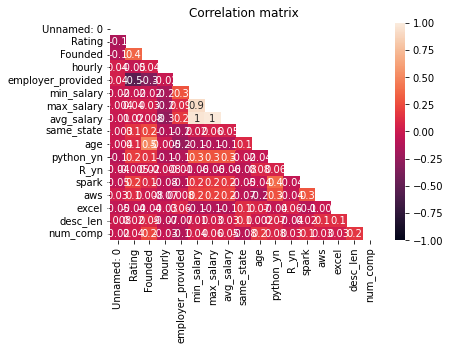

In [35]:
corr = data.corr()
matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix')
plt.show()

## Q12 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
string_columns = data[['avg_salary']]

encoded_columns = string_columns.apply(encoder.fit_transform)

# Replace the original columns with the encoded columns
data[['avg_salary']] = encoded_columns

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer

# Load your data into a DataFrame
df = data

# Split the data into predictor variables and target variable
X = df[['Rating','Founded','hourly','employer_provided',	'min_salary',	'max_salary'	,'same_state']]
y = df['avg_salary']

# Remove a certain percentage of data randomly
percentage = 0.1
missing_rows = np.random.choice(df.index, int(df.shape[0] * percentage), replace=False)
df_missing = df.loc[missing_rows]
df = df.drop(missing_rows)

# Define the imputation methods
mean_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer()
iter_imputer = IterativeImputer()

# Impute the missing values using each method
X_mean = mean_imputer.fit_transform(df_missing[['Rating','Founded','hourly','employer_provided',	'min_salary',	'max_salary'	,'same_state']])
X_knn = knn_imputer.fit_transform(df_missing[['Rating','Founded','hourly','employer_provided',	'min_salary',	'max_salary'	,'same_state']])
X_iter = iter_imputer.fit_transform(df_missing[['Rating','Founded','hourly','employer_provided',	'min_salary',	'max_salary'	,'same_state']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data and make predictions
model.fit(X, y)
y_pred = model.predict(X)
y_pred_mean = model.predict(X_mean)
y_pred_knn = model.predict(X_knn)
y_pred_iter = model.predict(X_iter)

# Calculate the performance metrics of the model for each imputation method
mae_mean = mean_absolute_error(df_missing['avg_salary'], y_pred_mean)
mse_mean = mean_squared_error(df_missing['avg_salary'], y_pred_mean)
mae_knn = mean_absolute_error(df_missing['avg_salary'], y_pred_knn)
mse_knn = mean_squared_error(df_missing['avg_salary'], y_pred_knn)
mae_iter = mean_absolute_error(df_missing['avg_salary'], y_pred_iter)
mse_iter = mean_squared_error(df_missing['avg_salary'], y_pred_iter)

# Print the performance metrics
print(f'Mean Imputation: MAE = {mae_mean}, MSE = {mse_mean}')
print(f'KNN Imput : MAE = {mae_knn}, MSE = {mse_knn}')


def calc_bias_variance(y, y_pred):
  y_mean = np.mean(y)
  bias = np.mean((y_mean - y_pred)**2)
  variance = np.mean((y_pred - y_mean)**2)
  return bias, variance

bias_mean, variance_mean = calc_bias_variance(df_missing['avg_salary'], y_pred_mean)
bias_knn, variance_knn = calc_bias_variance(df_missing['avg_salary'], y_pred_knn)
bias_iter, variance_iter = calc_bias_variance(df_missing['avg_salary'], y_pred_iter)

print(f'Mean Imputation: Bias = {bias_mean}, Variance = {variance_mean}')
print(f'KNN Imput : Bias = {bias_knn}, Variance = {variance_knn}')
print(f'Iterative Imputation: Bias = {bias_iter}, Variance = {variance_iter}')



Mean Imputation: MAE = 6.8443343787807605, MSE = 59.825195580254494
KNN Imput : MAE = 6.8443343787807605, MSE = 59.825195580254494
Mean Imputation: Bias = 1921.1616488073892, Variance = 1921.1616488073892
KNN Imput : Bias = 1921.1616488073892, Variance = 1921.1616488073892
Iterative Imputation: Bias = 1921.1616488073892, Variance = 1921.1616488073892


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer

# Load your data into a DataFrame
df = data

# Split the data into predictor variables and target variable
X = df[['Rating','Founded','hourly','employer_provided',	'min_salary',	'max_salary'	,'same_state']]
y = df['avg_salary']

# Remove a certain percentage of data randomly
percentage = 0.01
missing_rows = np.random.choice(df.index, int(df.shape[0] * percentage), replace=False)
df_missing = df.loc[missing_rows]
df = df.drop(missing_rows)

# Define the imputation methods
mean_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer()
iter_imputer = IterativeImputer()

# Impute the missing values using each method
X_mean = mean_imputer.fit_transform(df_missing[['Rating','Founded','hourly','employer_provided',	'min_salary',	'max_salary'	,'same_state']])
X_knn = knn_imputer.fit_transform(df_missing[['Rating','Founded','hourly','employer_provided',	'min_salary',	'max_salary'	,'same_state']])
X_iter = iter_imputer.fit_transform(df_missing[['Rating','Founded','hourly','employer_provided',	'min_salary',	'max_salary'	,'same_state']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data and make predictions
model.fit(X, y)
y_pred = model.predict(X)
y_pred_mean = model.predict(X_mean)
y_pred_knn = model.predict(X_knn)
y_pred_iter = model.predict(X_iter)

# Calculate the performance metrics of the model for each imputation method
mae_mean = mean_absolute_error(df_missing['avg_salary'], y_pred_mean)
mse_mean = mean_squared_error(df_missing['avg_salary'], y_pred_mean)
mae_knn = mean_absolute_error(df_missing['avg_salary'], y_pred_knn)
mse_knn = mean_squared_error(df_missing['avg_salary'], y_pred_knn)
mae_iter = mean_absolute_error(df_missing['avg_salary'], y_pred_iter)
mse_iter = mean_squared_error(df_missing['avg_salary'], y_pred_iter)

# Print the performance metrics
print(f'Mean Imputation: MAE = {mae_mean}, MSE = {mse_mean}')
print(f'KNN Imput : MAE = {mae_knn}, MSE = {mse_knn}')

def calc_bias_variance(y, y_pred):
  y_mean = np.mean(y)
  bias = np.mean((y_mean - y_pred)**2)
  variance = np.mean((y_pred - y_mean)**2)
  return bias, variance

bias_mean, variance_mean = calc_bias_variance(df_missing['avg_salary'], y_pred_mean)
bias_knn, variance_knn = calc_bias_variance(df_missing['avg_salary'], y_pred_knn)
bias_iter, variance_iter = calc_bias_variance(df_missing['avg_salary'], y_pred_iter)

print(f'Mean Imputation: Bias = {bias_mean}, Variance = {variance_mean}')
print(f'KNN Imput : Bias = {bias_knn}, Variance = {variance_knn}')
print(f'Iterative Imputation: Bias = {bias_iter}, Variance = {variance_iter}')




Mean Imputation: MAE = 5.762548041551199, MSE = 40.89174193816787
KNN Imput : MAE = 5.762548041551199, MSE = 40.89174193816787
Mean Imputation: Bias = 805.7571408966011, Variance = 805.7571408966011
KNN Imput : Bias = 805.7571408966011, Variance = 805.7571408966011
Iterative Imputation: Bias = 805.7571408966011, Variance = 805.7571408966011


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# References


1. Dataset: https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor
2. Class example notebook: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynbLinks
3. Correlation: https://www.kaggle.com/code/ishmaelnjihia/correlation
4. GeeksforGeeks: https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/